In [1]:
import os
def savefig(fig, name):
    if not os.path.exists('images'):
        os.makedirs('images')
    fig.savefig('images/' + name + '.png')

import matplotlib.pyplot as plt
import numpy as np

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

## Linear SVM Classification

In [2]:
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 2)

svm_clf = make_pipeline(StandardScaler(), LinearSVC(C = 1, random_state = 42, dual="auto"))
svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, dual='auto', random_state=42))])

In [3]:
X_new = [[5.5, 1.7], [5.0, 1.5]]
svm_clf.predict(X_new)

array([ True, False])

In [4]:
svm_clf.decision_function(X_new)

array([ 0.66163816, -0.22035761])

Unlike `LogisticRegression`, `LinearSVC` doesn't have a `predict_proba()` method to estimate the class probabilities.  That said, if you use the `SVC` class (discussed shortly)
instead of `LinearSVC`, and if you set its probability hyperparameter to `True`, then
the model will fit an extra model at the end of training to map the SVM decision
function scores to estimated probabilities. Under the hood, this requires using 5-fold
cross-validation to generate out-of-sample predictions for every instance in the training set, then training a LogisticRegression model, so it will slow down training
considerably. After that, the `predict_proba()` and `predict_log_proba()` methods
will be available.

## Nonlinear SVM Classification

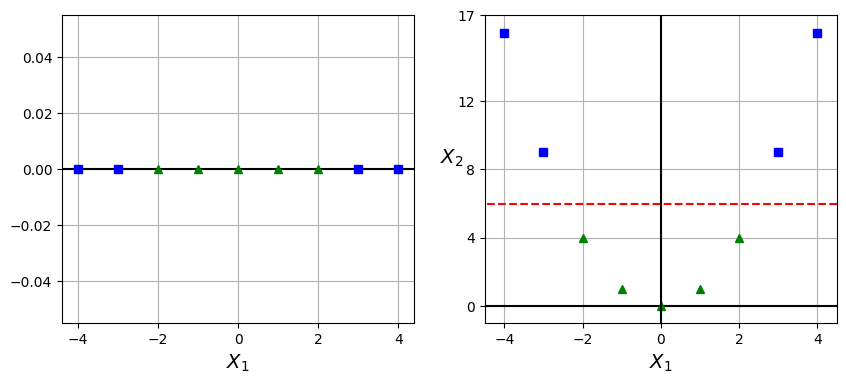

In [5]:
X_1D = np.linspace(-4, 4, 9).reshape(-1, 1) # to column vector
X_2D = np.c_[X_1D, X_1D ** 2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize = (10, 4))

plt.subplot(121)
plt.grid()
plt.axhline(y = 0, color = "k")
plt.plot(X_1D[:, 0][y==0], np.zeros(4), "bs")
plt.plot(X_1D[:, 0][y==1], np.zeros(5), "g^")
plt.xlabel(r"$X_1$")


plt.subplot(122)
plt.grid()
plt.axhline(y = 0, color = "k")
plt.plot(X_2D[:, 0][y==0], X_2D[:, 1][y==0], "bs")
plt.plot(X_2D[:, 0][y==1], X_2D[:, 1][y==1], "g^")
plt.plot([0, 0], [-10e9, 10e9], "k-")
plt.axis([-4.5, 4.5, -1, 16])
plt.yticks([0, 4, 8, 12, 17])
plt.plot([-5, 5], [6, 6], "r--")
plt.xlabel(r"$X_1$")
plt.ylabel(r"$X_2$", rotation = 0)

savefig(plt, "Adding features")

plt.show()

### Polynomial kernel

In [6]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples = 100, noise = 0.15, random_state = 42)

polynomial_svm_clf = make_pipeline(
    PolynomialFeatures(degree = 3),
    StandardScaler(),
    LinearSVC(C = 10, max_iter = 10000, random_state = 42, dual = "auto")
)

polynomial_svm_clf.fit(X, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=10, dual='auto', max_iter=10000,
                           random_state=42))])

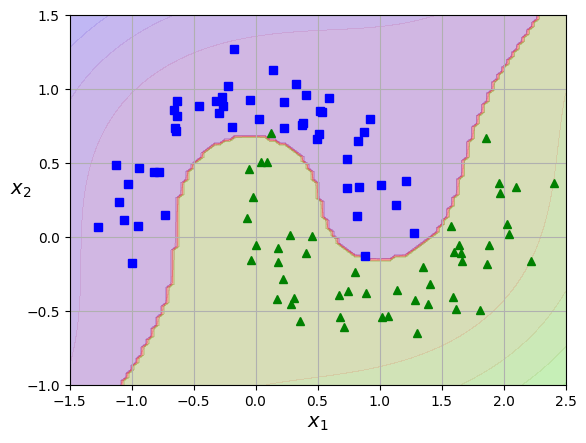

In [7]:
def plot_datasets(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid()
    plt.xlabel(r"$x_1$")
    plt.ylabel(r"$x_2$", rotation = 0)

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap = plt.cm.brg, alpha = 0.2)
    plt.contourf(x0, x1, y_decision, cmap = plt.cm.brg, alpha = 0.1)

plot_datasets(X, y, [-1.5, 2.5, -1, 1.5])
plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])

savefig(plt, "Polynomial SVM")
plt.show()

In [8]:
from sklearn.svm import SVC


poly_kernel_svm_clf = make_pipeline(
    StandardScaler(),
    SVC(kernel = "poly", degree = 3, coef0 = 1, C = 5)
)

poly_kernel_svm_clf2 = make_pipeline(
    StandardScaler(),
    SVC(kernel = "poly", degree = 10, coef0 = 100, C = 5)
)

poly_kernel_svm_clf.fit(X, y)
poly_kernel_svm_clf2.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, coef0=100, degree=10, kernel='poly'))])

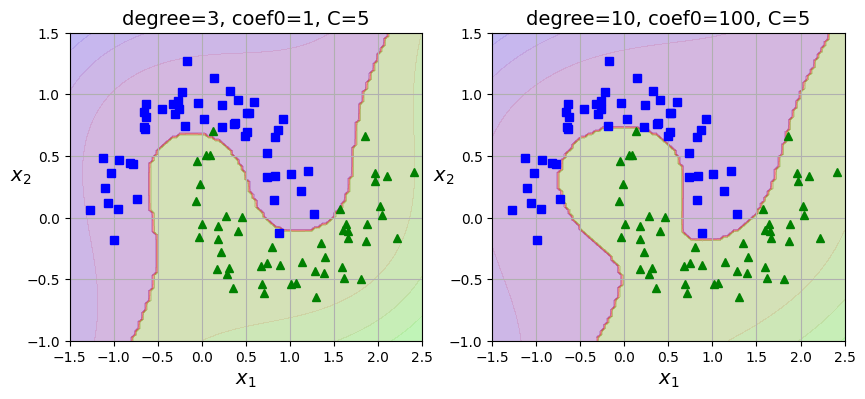

In [9]:
plt.figure(figsize=(10, 4))
plt.subplot(121)
plot_datasets(X, y, [-1.5, 2.5, -1, 1.5])
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plt.title("degree=3, coef0=1, C=5")

plt.subplot(122)
plot_datasets(X, y, [-1.5, 2.5, -1, 1.5])
plot_predictions(poly_kernel_svm_clf2, [-1.5, 2.5, -1, 1.5])
plt.title("degree=10, coef0=100, C=5")
savefig(plt, "SVC with poly")
plt.show()

### Similarity Features

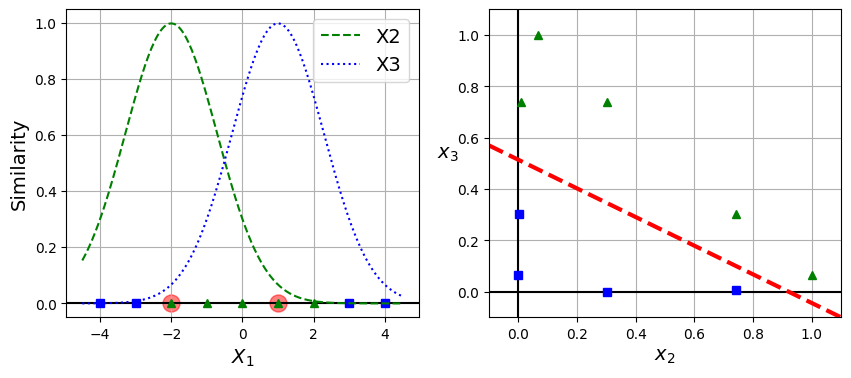

In [10]:
def gaussian_rbf(x, landmark, gamma):
    return np.exp(-gamma * np.linalg.norm(x - landmark, axis = 1)**2)

gamma = 0.3

x1s = np.linspace(-4.5, 4.5, 200).reshape(-1, 1)
x2s = gaussian_rbf(x1s, -2, gamma)
x3s = gaussian_rbf(x1s, 1, gamma)

XK = np.c_[gaussian_rbf(X_1D, -2, gamma), gaussian_rbf(X_1D, 1, gamma)]
yK = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize = (10, 4))
plt.subplot(121)
plt.grid()
plt.axhline(y = 0, color = 'k')
plt.scatter(x = [-2, 1], y = [0, 0], s = 150, alpha = 0.5, c = 'red')
plt.plot(X_1D[:, 0][yK == 0], np.zeros(4), "bs")
plt.plot(X_1D[:, 0][yK == 1], np.zeros(5), "g^")
plt.plot(x1s, x2s, "g--", label = "X2")
plt.plot(x1s, x3s, "b:", label = "X3")
plt.legend()
plt.xlabel("$X_1$")
plt.ylabel("Similarity")

# --

plt.subplot(122)
plt.grid()
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(XK[:, 0][yK==0], XK[:, 1][yK==0], "bs")
plt.plot(XK[:, 0][yK==1], XK[:, 1][yK==1], "g^")
plt.xlabel("$x_2$")
plt.ylabel("$x_3$  ", rotation=0)
plt.plot([-0.1, 1.1], [0.57, -0.1], "r--", linewidth=3)
plt.axis([-0.1, 1.1, -0.1, 1.1])
# ----
savefig(plt, "two_landmark")
plt.show()

### Gausian RBF Kernel

In [11]:
rbf_kernel_svm_clf = make_pipeline(
    StandardScaler(),
    SVC(kernel="rbf", gamma=5, C=0.001)
)
rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=0.001, gamma=5))])

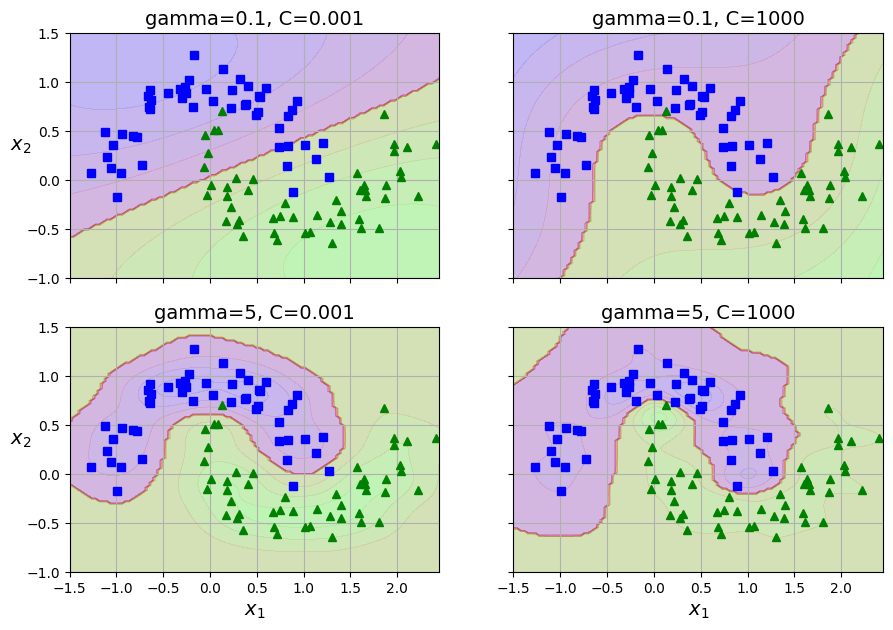

In [12]:
gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = make_pipeline(
        StandardScaler(),
        SVC(kernel="rbf", gamma=gamma, C=C)
    )
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10.5, 7), sharex=True, sharey=True)

for i, svm_clf in enumerate(svm_clfs):
    plt.sca(axes[i // 2, i % 2])
    plot_predictions(svm_clf, [-1.5, 2.45, -1, 1.5])
    plot_datasets(X, y, [-1.5, 2.45, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(f"gamma={gamma}, C={C}")
    if i in (0, 1):
        plt.xlabel("")
    if i in (1, 3):
        plt.ylabel("")

savefig(plt, "moons_rbf_svc_plot")
plt.show()

## SVM Classes and Computational Complexity

## SVM Regression

In [13]:
from sklearn.svm import LinearSVR

np.random.seed(42)
X = 2 * np.random.rand(50, 1)
y = 4 + 3 * X[:, 0] + np.random.randn(50)

svm_reg = make_pipeline(
    StandardScaler(),
    LinearSVR(epsilon=0.5, dual="auto", random_state=42)
)
svm_reg.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvr',
                 LinearSVR(dual='auto', epsilon=0.5, random_state=42))])

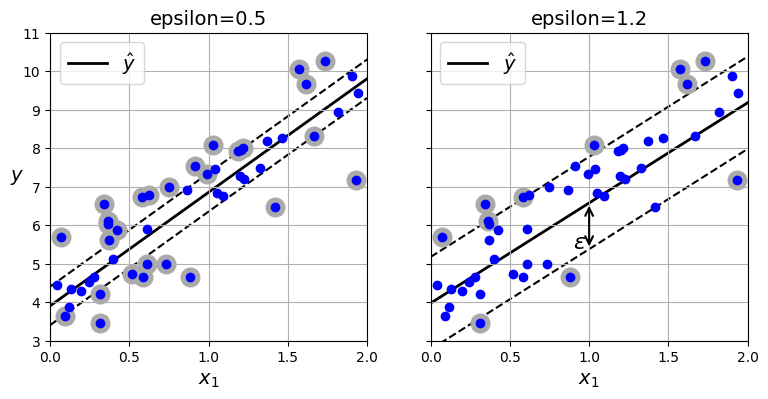

In [14]:
def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    epsilon = svm_reg[-1].epsilon
    off_margin = np.abs(y - y_pred) >= epsilon
    return np.argwhere(off_margin) # return index of off_margin value

def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    epsilon = svm_reg[-1].epsilon
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$", zorder=-2)
    plt.plot(x1s, y_pred + epsilon, "k--", zorder=-2)
    plt.plot(x1s, y_pred - epsilon, "k--", zorder=-2)
    plt.scatter(X[svm_reg._support], y[svm_reg._support], s=180,
                facecolors='#AAA', zorder=-1)
    plt.plot(X, y, "bo")
    plt.xlabel("$x_1$")
    plt.legend(loc="upper left")
    plt.axis(axes)

svm_reg2 = make_pipeline(StandardScaler(),
                         LinearSVR(epsilon=1.2, dual=True, random_state=42))
svm_reg2.fit(X, y)

svm_reg._support = find_support_vectors(svm_reg, X, y)
svm_reg2._support = find_support_vectors(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg2.predict([[eps_x1]])

fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_reg, X, y, [0, 2, 3, 11])
plt.title(f"epsilon={svm_reg[-1].epsilon}")
plt.ylabel("$y$", rotation=0)
plt.grid()
plt.sca(axes[1])
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(f"epsilon={svm_reg2[-1].epsilon}")
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg2[-1].epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.90, 5.4, r"$\epsilon$", fontsize=16)
plt.grid()
savefig(plt, "svm_regression_plot")
plt.show()

### polynomial kernel

In [15]:
from sklearn.svm import SVR
np.random.seed(42)
X = 2 * np.random.rand(50, 1) - 1
y = 0.2 + 0.1 * X[:, 0] + 0.5 * X[:, 0] ** 2 + np.random.randn(50) / 10

svm_poly_reg = make_pipeline(StandardScaler(),
                             SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1))
svm_poly_reg.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=0.01, degree=2, kernel='poly'))])